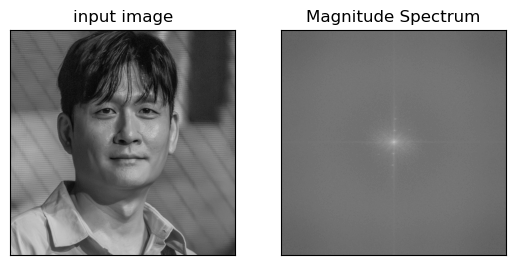

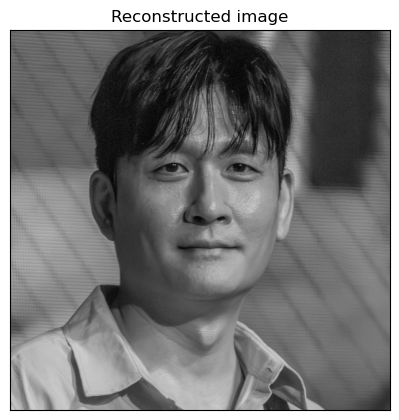

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/_X1A0372-Enhanced-NR.jpg', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum_original = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('input image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()



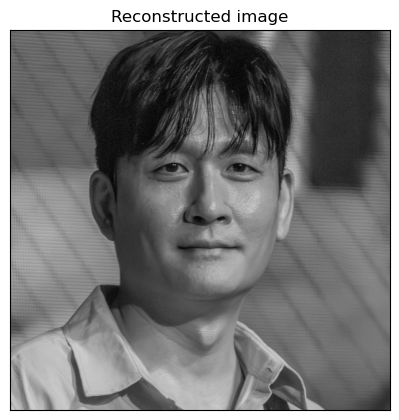

In [5]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

radius = 30

mask = np.ones((rows, cols), np.uint8)
mask[crow - radius:crow + radius, ccol - radius:ccol + radius]
fshift_filtered = fshift * mask

f_ishift = np.fft.ifftshift(fshift_filtered)

image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)

plt.figure(figsize=(12, 12))

plt.subplot(133), plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed image'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()